# Data Analysis 

User Profile of the School of Technology Progra{Maria}

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# 1. Data Processing

## 1.1. Importing Data

In [2]:
data = pd.read_excel('/home/apfa/Python Aulas/progMaria/global_atz_progMaria.xlsx')

In [3]:
data.head(15)

,Unnamed: 0,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,PREJUDICA?,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,GESTOR?,NIVEL,NOVO NÍVEL,CARGO COMO GESTOR,CARGO ATUAL,Unnamed: 26,FAIXA SALARIAL,SALARIO,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,FALSO,NaN,True,...,False,Júnior,Júnior,NaN,DBA/Administrador de Banco de Dados,NaN,de R$ 8.001/mês a R$ 12.000/mês,11194.0,de 1 a 2 anos,de 7 a 10 anos
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",TRUE,Aprovação em processos seletivos/entrevistas,True,...,True,NaN,Gestora,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,4695.0,de 3 a 4 anos,Menos de 1 ano
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,FALSO,NaN,True,...,False,Pleno,Pleno,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,NaN,de R$ 12.001/mês a R$ 16.000/mês,14202.0,de 3 a 4 anos,Mais de 10 anos
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,FALSO,NaN,True,...,False,Sênior,Sênior,NaN,Cientista de Dados/Data Scientist,NaN,de R$ 12.001/mês a R$ 16.000/mês,15463.0,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,FALSO,NaN,True,...,False,Pleno,Pleno,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,NaN,de R$ 6.001/mês a R$ 8.000/mês,7733.0,Não tenho experiência na área de dados,Mais de 10 anos
5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,FALSO,NaN,True,...,False,Pleno,Pleno,NaN,Professor,NaN,de R$ 2.001/mês a R$ 3.000/mês,2336.0,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...
6,zytlxsdgalh22cgrijvzytlxa49i8yzx,21.0,17-21,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,FALSO,NaN,True,...,False,Júnior,Júnior,NaN,Analista de BI/BI Analyst,NaN,de R$ 4.001/mês a R$ 6.000/mês,4491.0,de 1 a 2 anos,Menos de 1 ano
7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,FALSO,NaN,True,...,False,Júnior,Júnior,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,NaN,de R$ 2.001/mês a R$ 3.000/mês,2704.0,Menos de 1 ano,Menos de 1 ano
8,zy4o5dk6iuxpdwgzy4o58xvd6ykwohrj,33.0,30-34,Masculino,Branca,Não,NaN,FALSO,NaN,True,...,False,Sênior,Sênior,NaN,Analista de BI/BI Analyst,NaN,de R$ 6.001/mês a R$ 8.000/mês,7112.0,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...
9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,FALSO,NaN,True,...,False,Pleno,Pleno,NaN,Professor,NaN,de R$ 8.001/mês a R$ 12.000/mês,10822.0,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...


## 1.2. Outliers

the column use to identify the users 'Unnamed: 0' will be rename to 'ID'

In [4]:
data = data.rename(columns={'Unnamed: 0': 'ID'})

In [5]:
data.head(0)

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,PREJUDICA?,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,GESTOR?,NIVEL,NOVO NÍVEL,CARGO COMO GESTOR,CARGO ATUAL,Unnamed: 26,FAIXA SALARIAL,SALARIO,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?


### 1.2.1. Age outliers

Checking the age data 

In [6]:
data.groupby('IDADE', dropna=False)['ID'].nunique()

IDADE
18.0     13
19.0     22
20.0     33
21.0     78
22.0    108
23.0    145
24.0    196
25.0    274
26.0    281
27.0    299
28.0    291
29.0    253
30.0    248
31.0    253
32.0    225
33.0    180
34.0    189
35.0    145
36.0    154
37.0    118
38.0     78
39.0    103
40.0     67
41.0     63
42.0     54
43.0     51
44.0     42
45.0     41
46.0     31
47.0     32
48.0     21
49.0     19
50.0     34
51.0     10
52.0     20
53.0     12
54.0     13
NaN      74
Name: ID, dtype: int64

The query show 74 values = NaN. 
To solve, the column 'FAIXA IDADE' will be used to identify:
- The users age range 
- Define the mean of that range and replace

In [7]:
# NaN values at Age

data['IDADE'].isnull().value_counts()

IDADE
False    4197
True       74
Name: count, dtype: int64

In [8]:
# Find the age range 

data[data['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

FAIXA IDADE
55+      68
17-21     6
Name: count, dtype: int64

In [9]:
# Replacing age on 17-21 

mean_age_17_21 = data[data['FAIXA IDADE']=='17-21']['IDADE'].mean()
mean_age_17_21

20.205479452054796

In [10]:
# using .loc to replace the values

data.loc[(data['FAIXA IDADE']=='17-21')&(data['IDADE'].isnull()),'IDADE'] = mean_age_17_21

In [11]:
data[data['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

FAIXA IDADE
55+    68
Name: count, dtype: int64

In [12]:
# replace age on 55+

mean_age_55 = data[data['FAIXA IDADE']=='55+']['IDADE'].mean()
mean_age_55

nan

The Users 55+ don't inform the exacly age. 
So, the values will be replace for the mean age of all the users. 

In [13]:
mean_age = data['IDADE'].mean()
mean_age

31.153517220250375

In [14]:
data.loc[(data['FAIXA IDADE']=='55+')&(data['IDADE'].isnull()),'IDADE'] = mean_age

In [15]:
data[data['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

Series([], Name: count, dtype: int64)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b53612fc760>,
 'caps': [<matplotlib.lines.Line2D at 0x7b53612fcd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b53612fc490>],
 'medians': [<matplotlib.lines.Line2D at 0x7b53612fd2a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b53612fd570>],
 'means': []}

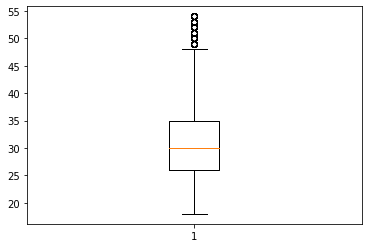

In [16]:
plt.boxplot(data['IDADE'])

Age data issues RESOLVED!

:) 

### 1.2.2 Salary outliers

In [17]:
data['SALARIO'].isnull().value_counts()

SALARIO
False    3694
True      577
Name: count, dtype: int64

In [18]:
data[data['SALARIO'].isnull()]['FAIXA SALARIAL'].value_counts()

Series([], Name: count, dtype: int64)

Since salaries have very different values, the median will be used instead of the average.

In [19]:
median_salary = data['SALARIO'].median()
data.loc[data['SALARIO'].isnull(),'SALARIO'] = median_salary

In [20]:
mean_salary = data['SALARIO'].mean()
mean_salary

10517.53348162023

In [21]:
standart_dev_salary = data['SALARIO'].std()
standart_dev_salary

18096.21098911858

In [22]:
# first quartiler 

q1 = data['SALARIO'].quantile(0.25)
q1

4751.5

In [23]:
# third quartiler 

q3 = data['SALARIO'].quantile(0.75)
q3

11794.5

In [24]:
# inter quartilers 

inter_q = q3 - q1 
inter_q

7043.0

In [25]:
# Upper limit 

upper_limit_salary = mean_salary + (3 * standart_dev_salary)
upper_limit_salary

64806.166448975964

In [26]:
# lower limit 

lower_limit_salary = mean_salary - (3 * standart_dev_salary)
lower_limit_salary

-43771.0994857355

In [27]:
import matplotlib.pyplot as plt


{'whiskers': [<matplotlib.lines.Line2D at 0x7b5360f1b250>,
 'caps': [<matplotlib.lines.Line2D at 0x7b5360f1b6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b5360f1af80>],
 'medians': [<matplotlib.lines.Line2D at 0x7b5360f1bc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b5360f1bf40>],
 'means': []}

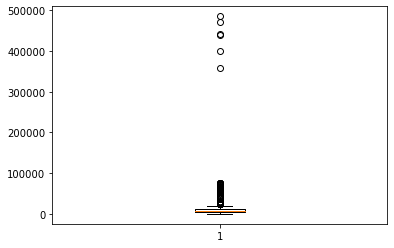

In [28]:
plt.boxplot(data['SALARIO'])

In [29]:
# first try to solve outliers problem

data[data['SALARIO']>upper_limit_salary]['FAIXA SALARIAL']

405               Acima de R$ 40.001/mês
443               Acima de R$ 40.001/mês
774               Acima de R$ 40.001/mês
1265              Acima de R$ 40.001/mês
2053    de R$ 30.001/mês a R$ 40.000/mês
2211              Acima de R$ 40.001/mês
2257    de R$ 30.001/mês a R$ 40.000/mês
2662              Acima de R$ 40.001/mês
2945              Acima de R$ 40.001/mês
2979              Acima de R$ 40.001/mês
3016              Acima de R$ 40.001/mês
3105              Acima de R$ 40.001/mês
3141              Acima de R$ 40.001/mês
3146              Acima de R$ 40.001/mês
3201    de R$ 30.001/mês a R$ 40.000/mês
3452              Acima de R$ 40.001/mês
3503              Acima de R$ 40.001/mês
3531              Acima de R$ 40.001/mês
3771              Acima de R$ 40.001/mês
3773              Acima de R$ 40.001/mês
3919              Acima de R$ 40.001/mês
3962              Acima de R$ 40.001/mês
Name: FAIXA SALARIAL, dtype: object

- The upper limit salary is RS: 64806.16. 
- If the user choose the salary range lower than RS: 30000 will be considered a typing mistake. 
- The average of the salaries between RS 30,000 and RS 40,000 will be used to replace these values. 

In [30]:
mean_30_40 = data[(data['FAIXA SALARIAL']=='de R$ 30.001/mês a R$ 40.000/mês')&(data['SALARIO']<upper_limit_salary)]['SALARIO'].mean()

In [31]:
data.loc[(data['FAIXA SALARIAL']=='de R$ 30.001/mês a R$ 40.000/mês') & (data['SALARIO']>upper_limit_salary),'SALARIO'] = mean_30_40

In [32]:
data[data['SALARIO']>upper_limit_salary]['FAIXA SALARIAL']

405     Acima de R$ 40.001/mês
443     Acima de R$ 40.001/mês
774     Acima de R$ 40.001/mês
1265    Acima de R$ 40.001/mês
2211    Acima de R$ 40.001/mês
2662    Acima de R$ 40.001/mês
2945    Acima de R$ 40.001/mês
2979    Acima de R$ 40.001/mês
3016    Acima de R$ 40.001/mês
3105    Acima de R$ 40.001/mês
3141    Acima de R$ 40.001/mês
3146    Acima de R$ 40.001/mês
3452    Acima de R$ 40.001/mês
3503    Acima de R$ 40.001/mês
3531    Acima de R$ 40.001/mês
3771    Acima de R$ 40.001/mês
3773    Acima de R$ 40.001/mês
3919    Acima de R$ 40.001/mês
3962    Acima de R$ 40.001/mês
Name: FAIXA SALARIAL, dtype: object

In [33]:
mean_salary_plus40 = data[(data['FAIXA SALARIAL']=='Acima de R$ 40.001/mês') & (data['SALARIO']<upper_limit_salary)]['SALARIO'].mean()
mean_salary_plus40

53127.846153846156

In [34]:
data.loc[(data['FAIXA SALARIAL']=='Acima de R$ 40.001/mês') & (data['SALARIO']>upper_limit_salary), 'SALARIO'] = mean_salary_plus40

In [35]:
data[data['SALARIO']>upper_limit_salary]['FAIXA SALARIAL']

Series([], Name: FAIXA SALARIAL, dtype: object)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b53610070d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b5361007670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b5361006e00>],
 'medians': [<matplotlib.lines.Line2D at 0x7b5361007c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b5361007ee0>],
 'means': []}

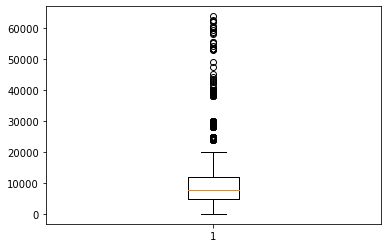

In [36]:
plt.boxplot(data['SALARIO'])

In [37]:
data['SALARIO'].isnull().value_counts()

SALARIO
False    4271
Name: count, dtype: int64

Salary outliers and data issues RESOLVED! 

:) 

# 2. Data Analysis

## 2.1. Who are our users?

### 2.1.1. Users' gender 

What is the gender distribution among our users?

In [38]:
data['GENERO'].value_counts()

GENERO
Masculino               3194
Feminino                1056
Prefiro não informar      12
Name: count, dtype: int64

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


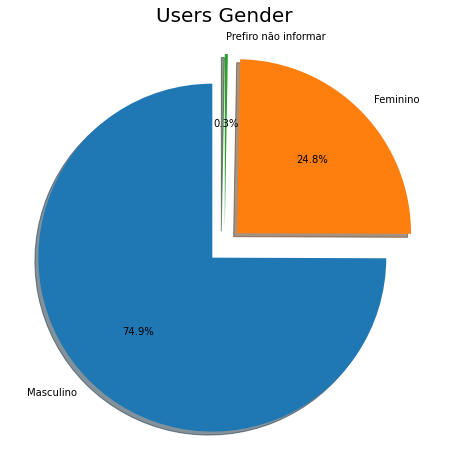

In [39]:

sizes = data['GENERO'].value_counts() 
labels = sizes.index  
sizes = sizes.values  

explode = (0.1,) * len(labels) 
plt.rcParams['font.family'] = 'Times New Roman'

fig, ax = plt.subplots(figsize=(10, 8))  
fig.patch.set_facecolor('white')

ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)

plt.title('Users Gender',  fontsize = 20)

plt.show()

### 2.1.2. Average age of users

What is the average age of our users?

In [40]:
mean_age = data['IDADE'].mean()
mean_age 

31.153517220250375

What is the maximum age of our users?

In [41]:
max_age = data['IDADE'].max()
max_age

54.0

What is the minimum age of our users?

In [42]:
min_age = data['IDADE'].min()
min_age

18.0

Is there any significant difference in the average age between genders?

In [43]:
mean_age_female = data[data['GENERO']=='Feminino']['IDADE'].mean()
mean_age_female

31.29591437447525

In [44]:
mean_age_male = data[data['GENERO']=='Masculino']['IDADE'].mean()
mean_age_male

31.13770428039173

In [45]:
print(f'The average ages of the users are quite similar regardless of gender. \n Female: {mean_age_female:.2f} \n Male: {mean_age_male:.2f} ')

The average ages of the users are quite similar regardless of gender. 
 Female: 31.30 
 Male: 31.14 


### 2.1.3 User Role

What are the roles held by our users?

In [46]:
data['NOVO NÍVEL'].value_counts()

NOVO NÍVEL
Pleno      1060
Júnior     1023
Sênior      898
Gestora     713
Name: count, dtype: int64

How are the functions distributed among the different genders?

In [47]:
# numerical

gender_role = pd.pivot_table(data, values=['ID'], index=['GENERO'], columns=['NOVO NÍVEL'], aggfunc='count')
gender_role

ID                    
NOVO NÍVEL           Gestora Júnior Pleno Sênior
GENERO                                          
Feminino                 132    272   295    187
Masculino                578    743   760    709
Prefiro não informar       2      4     4      1

In [48]:
#percentual

pivot_percent_role = gender_role.apply(lambda x: (x / x.sum()) * 100, axis=0)
pivot_percent_role


ID                                 
NOVO NÍVEL              Gestora     Júnior      Pleno     Sênior
GENERO                                                          
Feminino              18.539326  26.692836  27.856468  20.847269
Masculino             81.179775  72.914622  71.765817  79.041249
Prefiro não informar   0.280899   0.392542   0.377715   0.111483

#### users' role grafic

In [49]:
# male junior role

male_junior = np.array( data[(data['GENERO']=='Masculino') & (data['NOVO NÍVEL']=='Júnior')]['NOVO NÍVEL'].value_counts())[0]
male_junior

743

In [50]:
# female junior role
female_junior =  np.array( data[(data['GENERO']=='Feminino') & (data['NOVO NÍVEL']=='Júnior')]['NOVO NÍVEL'].value_counts())[0]
female_junior


272

In [51]:
# not inform junior

not_inform_junior = np.array( data[(data['GENERO']=='Prefiro não informar') & (data['NOVO NÍVEL']=='Júnior')]['NOVO NÍVEL'].value_counts())[0]
not_inform_junior

4

In [52]:
# male Plenor 

male_plenor_role = np.array( data[(data['GENERO']=='Masculino') & (data['NOVO NÍVEL']=='Pleno')]['NOVO NÍVEL'].value_counts())[0]
male_plenor_role

760

In [53]:
# female plenor role

female_plenor_role = np.array( data[(data['GENERO']=='Feminino') & (data['NOVO NÍVEL']=='Pleno')]['NOVO NÍVEL'].value_counts() )[0]
female_plenor_role

295

In [54]:
# not inform gender plenor role

notinform_plenor_role = np.array(data[ (data['GENERO']=='Prefiro não informar') & (data['NOVO NÍVEL']=='Pleno')]['NOVO NÍVEL'].value_counts())[0]
notinform_plenor_role

4

In [55]:
# male senior role

male_senior_role = np.array(data[(data['GENERO']=='Masculino') & (data['NOVO NÍVEL']=='Sênior') ]['NOVO NÍVEL'].value_counts())[0]
male_senior_role

709

In [56]:
# female senior role 

female_senior_role = np.array(data[ (data['GENERO']=='Feminino') & (data['NOVO NÍVEL']=='Sênior')]['NOVO NÍVEL'].value_counts())[0]
female_senior_role

187

In [57]:
# not inform gender senior role 

notinform_senior_role = np.array(data[ (data['GENERO']=='Prefiro não informar') & (data['NOVO NÍVEL']=='Sênior')]['NOVO NÍVEL'].value_counts())[0]
notinform_senior_role

1

In [58]:
# male manager role

male_manager_role = np.array(data[(data['GENERO']=='Masculino') & (data['NOVO NÍVEL']=='Gestora')]['NOVO NÍVEL'].value_counts())[0]
male_manager_role

578

In [59]:
# female manager role

female_manager_role = np.array(data[(data['GENERO']=='Feminino') & (data['NOVO NÍVEL']=='Gestora')]['NOVO NÍVEL'].value_counts())[0]
female_manager_role

132

In [60]:
# not inform gender manager role

notinform_manager_role = np.array(data[(data['GENERO']=='Prefiro não informar') & (data['NOVO NÍVEL']=='Gestora')]['NOVO NÍVEL'].value_counts())[0]
notinform_manager_role

2

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


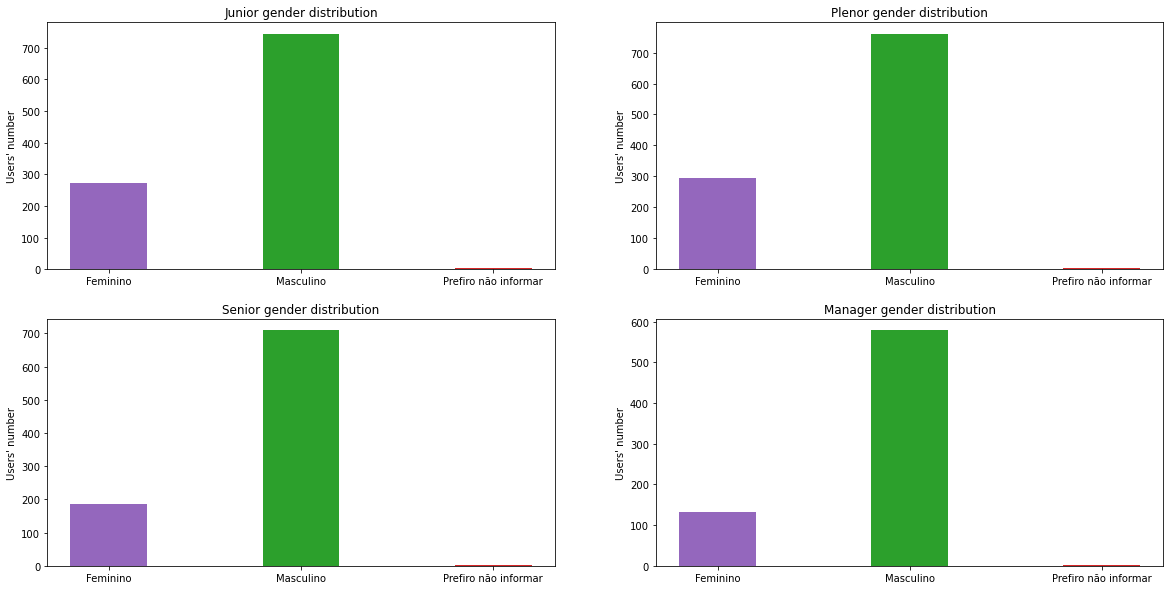

In [61]:
fig, axs = plt.subplots(2, 2,figsize=(20, 10))

bar_labels = 'Feminino', 'Masculino', 'Prefiro não informar'
bar_colors = ['tab:purple', 'tab:green', 'tab:red']

gender = ['Feminino','Masculino','Prefiro não informar']
count_junior = [female_junior,male_junior,not_inform_junior]

axs[0, 0].bar(gender, count_junior, label=bar_labels, color=bar_colors,  width = 0.4)
axs[0, 0].set_title('Junior gender distribution')

count_plenor = [female_plenor_role,male_plenor_role,notinform_plenor_role]
axs[0, 1].bar(gender, count_plenor, label=bar_labels, color=bar_colors,  width = 0.4)
axs[0, 1].set_title('Plenor gender distribution')

count_senior = [female_senior_role,male_senior_role,notinform_senior_role]
axs[1, 0].bar(gender, count_senior, label=bar_labels, color=bar_colors,  width = 0.4)
axs[1, 0].set_title('Senior gender distribution')

count_manager = [female_manager_role,male_manager_role,notinform_manager_role]
axs[1, 1].bar(gender, count_manager, label=bar_labels, color=bar_colors,  width = 0.4)
axs[1, 1].set_title('Manager gender distribution')

for ax in axs.flat:
    ax.set(ylabel="Users' number")

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

### 2.1.4 Ethnicity of users

What is the ethnic distribution of our users?

In [62]:
data['COR/RACA/ETNIA'].value_counts(dropna=False)

COR/RACA/ETNIA
Branca                  2744
Parda                   1054
Preta                    291
Amarela                  128
Prefiro não informar      26
Outra                     17
Indígena                  11
Name: count, dtype: int64

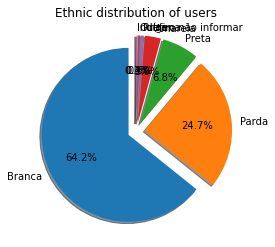

In [63]:
sizes = data['COR/RACA/ETNIA'].value_counts() 
labels = sizes.index  
sizes = sizes.values  

explode = (0.1,) * len(labels) 

fig, ax = plt.subplots()  
fig.patch.set_facecolor('white')

ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)

plt.title('Ethnic distribution of users')

plt.show()

How are different ethnic groups distributed across the roles they occupy?

In [64]:
# numerical

ethnical_role = pd.pivot_table(data, values=['ID'], index=['COR/RACA/ETNIA'], columns=['NOVO NÍVEL'], aggfunc='count')
ethnical_role

ID                    
NOVO NÍVEL           Gestora Júnior Pleno Sênior
COR/RACA/ETNIA                                  
Amarela                   28     29    27     27
Branca                   480    611   684    622
Indígena                   1      4     3      2
Outra                      5      4     1      3
Parda                    162    267   267    201
Prefiro não informar       2     10     9      4
Preta                     35     98    69     39

In [65]:
# percentual

pivot_percent_role_ethnic = ethnical_role.apply(lambda x: (x / x.sum()) * 100, axis=0)
pivot_percent_role_ethnic

ID                                 
NOVO NÍVEL              Gestora     Júnior      Pleno     Sênior
COR/RACA/ETNIA                                                  
Amarela                3.927069   2.834800   2.547170   3.006682
Branca                67.321178  59.726295  64.528302  69.265033
Indígena               0.140252   0.391007   0.283019   0.222717
Outra                  0.701262   0.391007   0.094340   0.334076
Parda                 22.720898  26.099707  25.188679  22.383073
Prefiro não informar   0.280505   0.977517   0.849057   0.445434
Preta                  4.908836   9.579668   6.509434   4.342984

## 2.2. Aspects of diversity and inclusion

What is the percentage of users with disabilities?

In [66]:
data['PCD'].value_counts()

PCD
Não                     4198
Sim                       54
Prefiro não informar      19
Name: count, dtype: int64

How are users with disabilities distributed across different roles? Is there any role where representation is higher or lower?

In [67]:
pcd_role = data[(data['PCD']=='Sim') & (data['NOVO NÍVEL'])]['NOVO NÍVEL'].value_counts()
pcd_role

NOVO NÍVEL
Júnior     20
Sênior     13
Pleno      10
Gestora     5
Name: count, dtype: int64

In [68]:
percetual_pcd_junior = (20/54)*100
percetual_pcd_junior


37.03703703703704

In [69]:

pcd_role_junior = np.array(data[ (data['PCD']=='Sim') & (data['NOVO NÍVEL']=='Júnior') ]['PCD'].value_counts())[0]
pcd_role_junior

20

In [70]:
percetual_pcd_pleno = (10/54)*100
percetual_pcd_pleno

18.51851851851852

In [71]:
pcd_role_plenor = np.array(data[ (data['PCD']=='Sim') & (data['NOVO NÍVEL']=='Pleno') ]['PCD'].value_counts())[0]
pcd_role_plenor

10

In [72]:
percetual_pcd_senior = (13/54)*100
percetual_pcd_senior

24.074074074074073

In [73]:
pcd_role_senior = np.array(data[ (data['PCD']=='Sim') & (data['NOVO NÍVEL']=='Sênior') ]['PCD'].value_counts())[0]
pcd_role_senior

13

In [74]:
percetual_pcd_gestor = (5/54)*100
percetual_pcd_gestor

9.25925925925926

In [75]:
pcd_role_manager = np.array(data[ (data['PCD']=='Sim') & (data['NOVO NÍVEL']=='Gestora') ]['PCD'].value_counts())[0]
pcd_role_manager

5

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


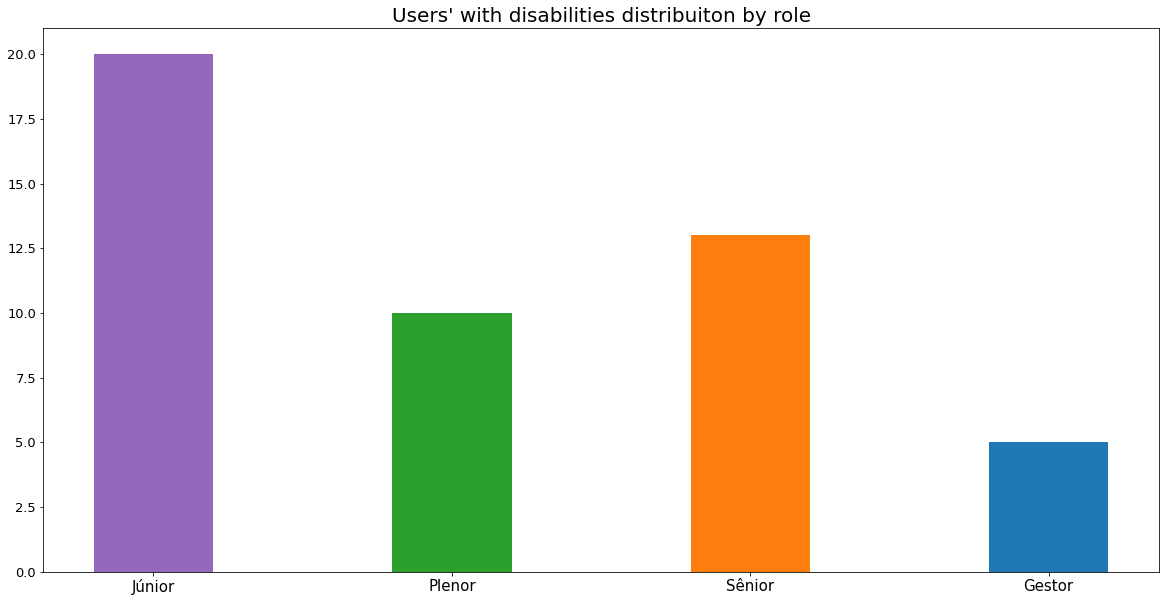

In [76]:
plt.rcParams['font.family'] = 'Times New Roman'

fig, axs = plt.subplots(figsize=(20, 10))

bar_labels = 'Júnior', 'Plenor', 'Sênior', 'Gestor'
bar_colors = ['tab:purple', 'tab:green', 'tab:orange', 'tab:blue']

role_pcd = ['Júnior','Plenor','Sênior', 'Gestor']
count_junior = [pcd_role_junior,pcd_role_plenor, pcd_role_senior, pcd_role_manager]

axs.bar(role_pcd, count_junior, label=bar_labels, color=bar_colors,  width = 0.4)
ax.set_ylabel("Total number of users with disabilities.", fontsize = 20)
ax.set_xlabel("Users' Role", fontsize = 20)
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 13) 
axs.set_title("Users' with disabilities distribuiton by role", fontsize = 20)
ax.legend()

Conslusions: 
- The representation of people with disabilities is extremely low, accounting for only about 1.26% of the total employees. This raises questions about the effectiveness of the company's inclusion and diversity policies. Is the organization truly promoting inclusion, or does this low representation reflect barriers in the recruitment and selection process?

- The decision of 19 employees not to disclose whether they are people with disabilities (PWDs) may suggest an organizational environment where individuals do not feel completely safe or comfortable identifying as such. This could indicate that the organizational culture is not yet fully inclusive or that there are concerns about discrimination or stigmatization.

Higher Representation:
- The Júnior role has the highest representation of users with disabilities (37.03%). This suggests that users with disabilities are more commonly found in entry-level positions.

Lower Representation:
- The Gestora role has the lowest representation (9.2%). This indicates that users with disabilities are less represented in managerial positions compared to other roles.

- The concentration of people with disabilities (PWDs) in lower-level positions (Junior) suggests potential challenges in the professional advancement of these employees. This may indicate a lack of development opportunities or the presence of biases and stigmas that hinder the career progression of PWDs to roles with greater responsibility. Additionally, only 5 PWDs hold management positions, raising concerns about inclusion in leadership roles.


Suggestion: 

- These numbers suggest an urgent need for more robust and focused actions on inclusion and awareness within the company. Professional development programs, inclusive recruitment policies, and awareness campaigns can help balance this distribution and ensure that more people with disabilities have access to all hierarchical levels, including leadership positions.

## 2.3. Salary analysis

### 2.3.1. Averege Salary

In [77]:
# Mean salary

mean_salary_global = data['SALARIO'].mean()
print(f'The mean salary of the users is R${mean_salary_global:.2f}.')


The mean salary of the users is R$9904.39.


### 2.3.2. Averege Salary per gender

In [78]:
# Men averege salary

mean_salary_men = (data[(data['GENERO']=='Masculino') & (data['SALARIO'])]['SALARIO'].mean())
mean_salary_men

10393.555983988348

In [79]:
# Female averege salary

mean_salary_female = (data[(data['GENERO']=='Feminino') & (data['SALARIO'])])['SALARIO'].mean()
mean_salary_female

8482.256483100233

In [80]:
percent_difer_salary =percentual_diferenca = ((mean_salary_men - mean_salary_female) / mean_salary_female) * 100

print(f'The difference in average salary between men and women is {percent_difer_salary:.2f}%.')

The difference in average salary between men and women is 22.53%.


Calculating the maximum, minimum and mean salary managers by gender

MALE

In [81]:
salary_mean_male_manager = data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Gestora']['SALARIO'].mean()
salary_mean_male_manager

/tmp/ipykernel_43640/1515062245.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  salary_mean_male_manager = data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Gestora']['SALARIO'].mean()


18596.085712639884

In [82]:
minimum_salary_male_manager = data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Gestora']['SALARIO'].min()
minimum_salary_male_manager

/tmp/ipykernel_43640/3887601213.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minimum_salary_male_manager = data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Gestora']['SALARIO'].min()


175.0

In [83]:
maximum_salary_male_manager = data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Gestora']['SALARIO'].max()
maximum_salary_male_manager

/tmp/ipykernel_43640/2043029575.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  maximum_salary_male_manager = data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Gestora']['SALARIO'].max()


62309.0

FEMALE

In [84]:
salary_mean_female_manager = data[data['GENERO']=='Feminino'][data['NOVO NÍVEL']=='Gestora']['SALARIO'].mean()
salary_mean_female_manager

/tmp/ipykernel_43640/2953842121.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  salary_mean_female_manager = data[data['GENERO']=='Feminino'][data['NOVO NÍVEL']=='Gestora']['SALARIO'].mean()


15183.817016317014

/tmp/ipykernel_43640/277908366.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minimum_salary_female_manager = data[data['GENERO']=='Feminino'][data['NOVO NÍVEL']=='Gestora']['SALARIO'].min()
/tmp/ipykernel_43640/277908366.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.boxplot(data[data['GENERO']=='Feminino'][data['NOVO NÍVEL']=='Gestora']['SALARIO'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7b5360dabe50>,
 'caps': [<matplotlib.lines.Line2D at 0x7b5360dd8430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b5360dabb80>],
 'medians': [<matplotlib.lines.Line2D at 0x7b5360dd88b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b5360dd8b80>],
 'means': []}

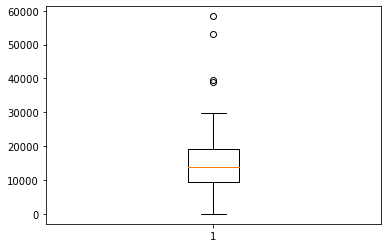

In [85]:
minimum_salary_female_manager = data[data['GENERO']=='Feminino'][data['NOVO NÍVEL']=='Gestora']['SALARIO'].min()
minimum_salary_female_manager
plt.boxplot(data[data['GENERO']=='Feminino'][data['NOVO NÍVEL']=='Gestora']['SALARIO'])

In [86]:
maximum_salary_female_manager = data[data['GENERO']=='Feminino'][data['NOVO NÍVEL']=='Gestora']['SALARIO'].max()
maximum_salary_female_manager

/tmp/ipykernel_43640/3268487666.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  maximum_salary_female_manager = data[data['GENERO']=='Feminino'][data['NOVO NÍVEL']=='Gestora']['SALARIO'].max()


58362.0

Confidence interval

In [87]:
# Salary confidance level

level_confidance = 0.95

In [88]:
salary = data['SALARIO']

# Salary sample mean
sample_mean = np.mean(salary)
sample_mean

9904.390109813306

In [89]:
# Salary standart dev.
standart_sample = np.std(salary)
standart_sample

8306.104872579352

In [90]:
len_sample = len(salary)
len_sample

4271

In [91]:
from scipy import stats

In [92]:
# Standart error
standart_error = stats.sem(salary)
standart_error

127.11109872023638

In [93]:
# Confidence level
stats.t.interval(level_confidance,len_sample - 1,sample_mean,scale=standart_error)

(9655.186295869078, 10153.593923757535)

Using a 90% confidence interval, we will obtain the average salary by position and by gender.

In [94]:
level_conf = 0.90

In [95]:
# média salárial homens

men_salary = (data[(data['GENERO']=='Masculino') & (data['SALARIO'])]['SALARIO'])
sample_mean_men = np.mean(men_salary)
sample_mean_men


10393.555983988348

In [96]:

# média salárial mulheres
fema_salary = (data[(data['GENERO']=='Feminino') & (data['SALARIO'])]['SALARIO'])
sample_mean_fema = np.mean(fema_salary)
sample_mean_fema


8482.256483100233

In [97]:
# Men Salary standart dev.
standart_sample_men = np.std(men_salary)
standart_sample_men

8851.177579659627

In [98]:
# Female Salary standart dev.
standart_sample_fema = np.std(fema_salary)
standart_sample_fema

6219.175917029193

In [99]:
len_sample_men = len(men_salary)
len_sample_men

3194

In [100]:
len_sample_fema = len(fema_salary)
len_sample_fema

1056

In [101]:
# Standart error
standart_error_men = stats.sem(men_salary)
standart_error_men

156.63961057139747

In [102]:
# Standart error
standart_error_fema = stats.sem(fema_salary)
standart_error_fema

191.47258991578335

In [103]:
# Confidence level
mcfs = stats.t.interval(level_conf,len_sample_men - 1,sample_mean_men,scale=standart_error_men)
mcfs

(10135.831978757044, 10651.279989219653)

In [104]:
# Confidence level
fecfs = stats.t.interval(level_conf,len_sample_fema - 1,sample_mean_fema,scale=standart_error_fema)
fecfs

(8167.035304852151, 8797.477661348315)

In [105]:
print(f'With 90% of confidence the men mean salary is {mcfs}.')

With 90% of confidence the men mean salary is (10135.831978757044, 10651.279989219653).


In [106]:
print(f'With 90% of confidence the female mean salary is {fecfs}.')

With 90% of confidence the female mean salary is (8167.035304852151, 8797.477661348315).


## 2.3.3 Pearson correlation for ages and salaries

In [107]:
# Using pandas and Pearson correlation 

continum_correlation = data['IDADE'].corr(data['SALARIO'])
continum_correlation

0.2887444378270231

In [108]:
print(f'The correlation between ages and salaries is {continum_correlation:.4f}. So the age have not a huge influence in salary growth.')

The correlation between ages and salaries is 0.2887. So the age have not a huge influence in salary growth.


In [109]:
from scipy.stats import chi2_contingency

In [116]:
# To understand better what is the most important correlations to growth salary using Cramer coeficient

def cramer_coef(column1, column2):
    table_cross = np.array(pd.crosstab(column1,column2))
    chi2 = chi2_contingency(table_cross)[0]
    suma = np.sum(table_cross)
    mini_tb = min(table_cross.shape)-1
    cramer = np.sqrt(chi2/(suma*mini_tb))
    return cramer

In [117]:
cramer_coef(data['NIVEL DE ENSINO'], data['COR/RACA/ETNIA'])

0.045033205954189165

In [120]:
print(f'A baixa correlação apresentada pelo coeficiente de Cramer 0.045 leva a entender que não há relação entre etnia e nível de ensino.\n Entretanto na sociedade esses são fatores fortemente correlacionados. \nSerá que essa baixa correlação de cramer se deve ao fato que a área de TI já é uma área que já exige formação para atuar?')

A baixa correlação apresentada pelo coeficiente de Cramer 0.045 leva a entender que não há relação entre etnia e nível de ensino.
 Entretanto na sociedade esses são fatores fortemente correlacionados. 
Será que essa baixa correlação de cramer se deve ao fato que a área de TI já é uma área que já exige formação para atuar?


In [133]:
cramer_coef(data['SALARIO'], data['REGIAO ONDE MORA'])

0.867593417262536

In [139]:
cramer_coef(data['SALARIO'], data['ESTADO ONDE MORA'])

0.8477907390642432

In [134]:
cramer_coef(data['SALARIO'], data['MUDOU DE ESTADO?'])

0.8865810024374068

In [138]:
cramer_coef(data['SALARIO'], data['NIVEL DE ENSINO'])

0.8402197103836125

In [137]:
cramer_coef(data['SALARIO'], data['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'])

0.951641915563398

In [140]:
cramer_coef(data['SALARIO'], data['GENERO'])

0.8635250449572586

In [124]:
data.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'PREJUDICA?',
       'ASPECTOS_PREJUDICADOS', 'VIVE_NO_BRASIL', 'ESTADO ONDE MORA',
       'UF ONDE MORA', 'REGIAO ONDE MORA', 'MUDOU DE ESTADO?',
       'REGIAO DE ORIGEM', 'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'COMPUTAÇÃO?', 'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'NIVEL', 'NOVO NÍVEL',
       'CARGO COMO GESTOR', 'CARGO ATUAL', 'Unnamed: 26', 'FAIXA SALARIAL',
       'SALARIO', 'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?'],
      dtype='object')

In [ ]:
table_cross = pd.crosstab(data['NIVEL DE ENSINO'], data['COR/RACA/ETNIA'])
table_cross

In [ ]:
np.array(table_cross)

In [ ]:
data.columns

# 3. Featuring Engineering

In [ ]:
# Preencher nível do cargo 

def preencher_level(gestor,nível):
    if gestor == 1:
        return "Pessoa Gestora"
    else:
        return nível
    
    
    

In [ ]:
# Aplicando a função na tabela de dados

data['NOVO NÍVEL'] = data.apply(lambda x: preencher_level(x['GESTOR?'], x['NIVEL']), axis=1)

In [ ]:
# Checando se a coluna está ok? 
data['NOVO NÍVEL'].value_counts()

In [ ]:
# Transformando variaveis categorigas em indicadores de 'sim' ou 'não'
# Ou seja, criando coluna para cada nível

data = pd.get_dummies(data, columns=['NOVO NÍVEL'])


In [ ]:
def determinar_geracao(idade):
    if 39 < idade <= 58:
        return "Geração X"
    elif 29 < idade <= 39:
        return "Millenium"
    elif 13 < idade <=29:
        return "Geração Z"
    else:
        return "Outra geração"

In [ ]:
# Aplicando a função e criando a coluna de geração 

data['GERAÇÃO'] = data.apply(lambda x: determinar_geracao(x['IDADE']), axis=1)

In [ ]:
data['GERAÇÃO'].value_counts()

In [ ]:
data_two = pd.read_excel('/home/apfa/Python Aulas/progMaria/dados_dois_progrmaria.xlsx')

In [ ]:
data_two.head()

In [ ]:
# Connect both tables using the ID column
# Now we have a new 'data'
data = data.merge(data_two, on='ID', how='left')

In [ ]:
data.columns

In [ ]:
data['Você pretende mudar de emprego nos próximos 6 meses?_y'].value_counts()

In [ ]:
# Creating new columns 
# Using 'contens' to search specific words

data['EM BUSCA'] = data['Você pretende mudar de emprego nos próximos 6 meses?_y'].str.contains('em busca', case=False)


In [ ]:
data['EM BUSCA'].value_counts()

In [ ]:
data['ABERTO A OPORTUNIDADES'] = data['Você pretende mudar de emprego nos próximos 6 meses?_y'].str.contains('aberto', case=False)

In [ ]:
data['ABERTO A OPORTUNIDADES'].value_counts()

In [ ]:
data['Quais das linguagens listadas abaixo você utiliza no trabalho?_y'].value_counts()

In [ ]:
data['PYTHON'] = data['Quais das linguagens listadas abaixo você utiliza no trabalho?_y'].str.contains('Python', case=False)

In [ ]:
data['PYTHON'].value_counts()

In [ ]:
data['SQL'] = data['Quais das linguagens listadas abaixo você utiliza no trabalho?_y'].str.contains('SQL', case=False)

In [ ]:
data['SQL'].value_counts()